#### Lab1: Principal Component Analysis on Computer Hardware Dataset form ucimlrepo

#### *Dataset Description*

This dataset contains Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.

The estimated relative performance values were estimated by the authors using a linear regression method.  See their article https://doi.org/10.24432/C5830D. (pp 308-313) for more details on how the relative performance values were set.



| Variable Name | Description | Units |
|---            |---          |---    |
| VendorName | List of Vendors(adviser,amdahl,etc.) | - |
| ModelName | Unique Model Symbol | - |
| MYCT | Machine Cycle Time | nanoseconds |
| MMIN | Minimum Main Memory | kilobytes |
| MMAX | Maximum Main Memory | kilobytes |
| CACH | Cache Memory | kilobytes |
| CHMAX | Maximum Channels | units |
| CHMIN | Minimum Channels | units |
| PRP | Published Relative Performance | - |
| ERP | Estimated Relative Performance | - |

In [1]:
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset 
computer_hardware = fetch_ucirepo(id=29) 
  
# data (as pandas dataframes) 
df = computer_hardware.data.features 




In [3]:
df.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
df.columns

Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [5]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [6]:
# check for missing values in each feature
df.isnull().sum()

VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64

In [131]:
# check the datatype of each feature
df.dtypes
df.loc[df['ERP'] == max(df['ERP'])]
# df.loc[df['ERP'] == min(df['ERP'])]

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [132]:
df.loc[df['ERP'] == min(df['ERP'])]

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
14,bti,5000,350,64,64,0,1,4,10,15
99,ibm,370/125-2,480,96,512,0,1,1,6,15


In [8]:
# get only numerical features
num_features = df.drop(['VendorName','ModelName'],axis=1)
num_features

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42,37
205,98,1000,8000,32,2,8,46,50
206,125,2000,8000,0,2,14,52,41
207,480,512,8000,32,0,0,67,47


In [9]:
num_features.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


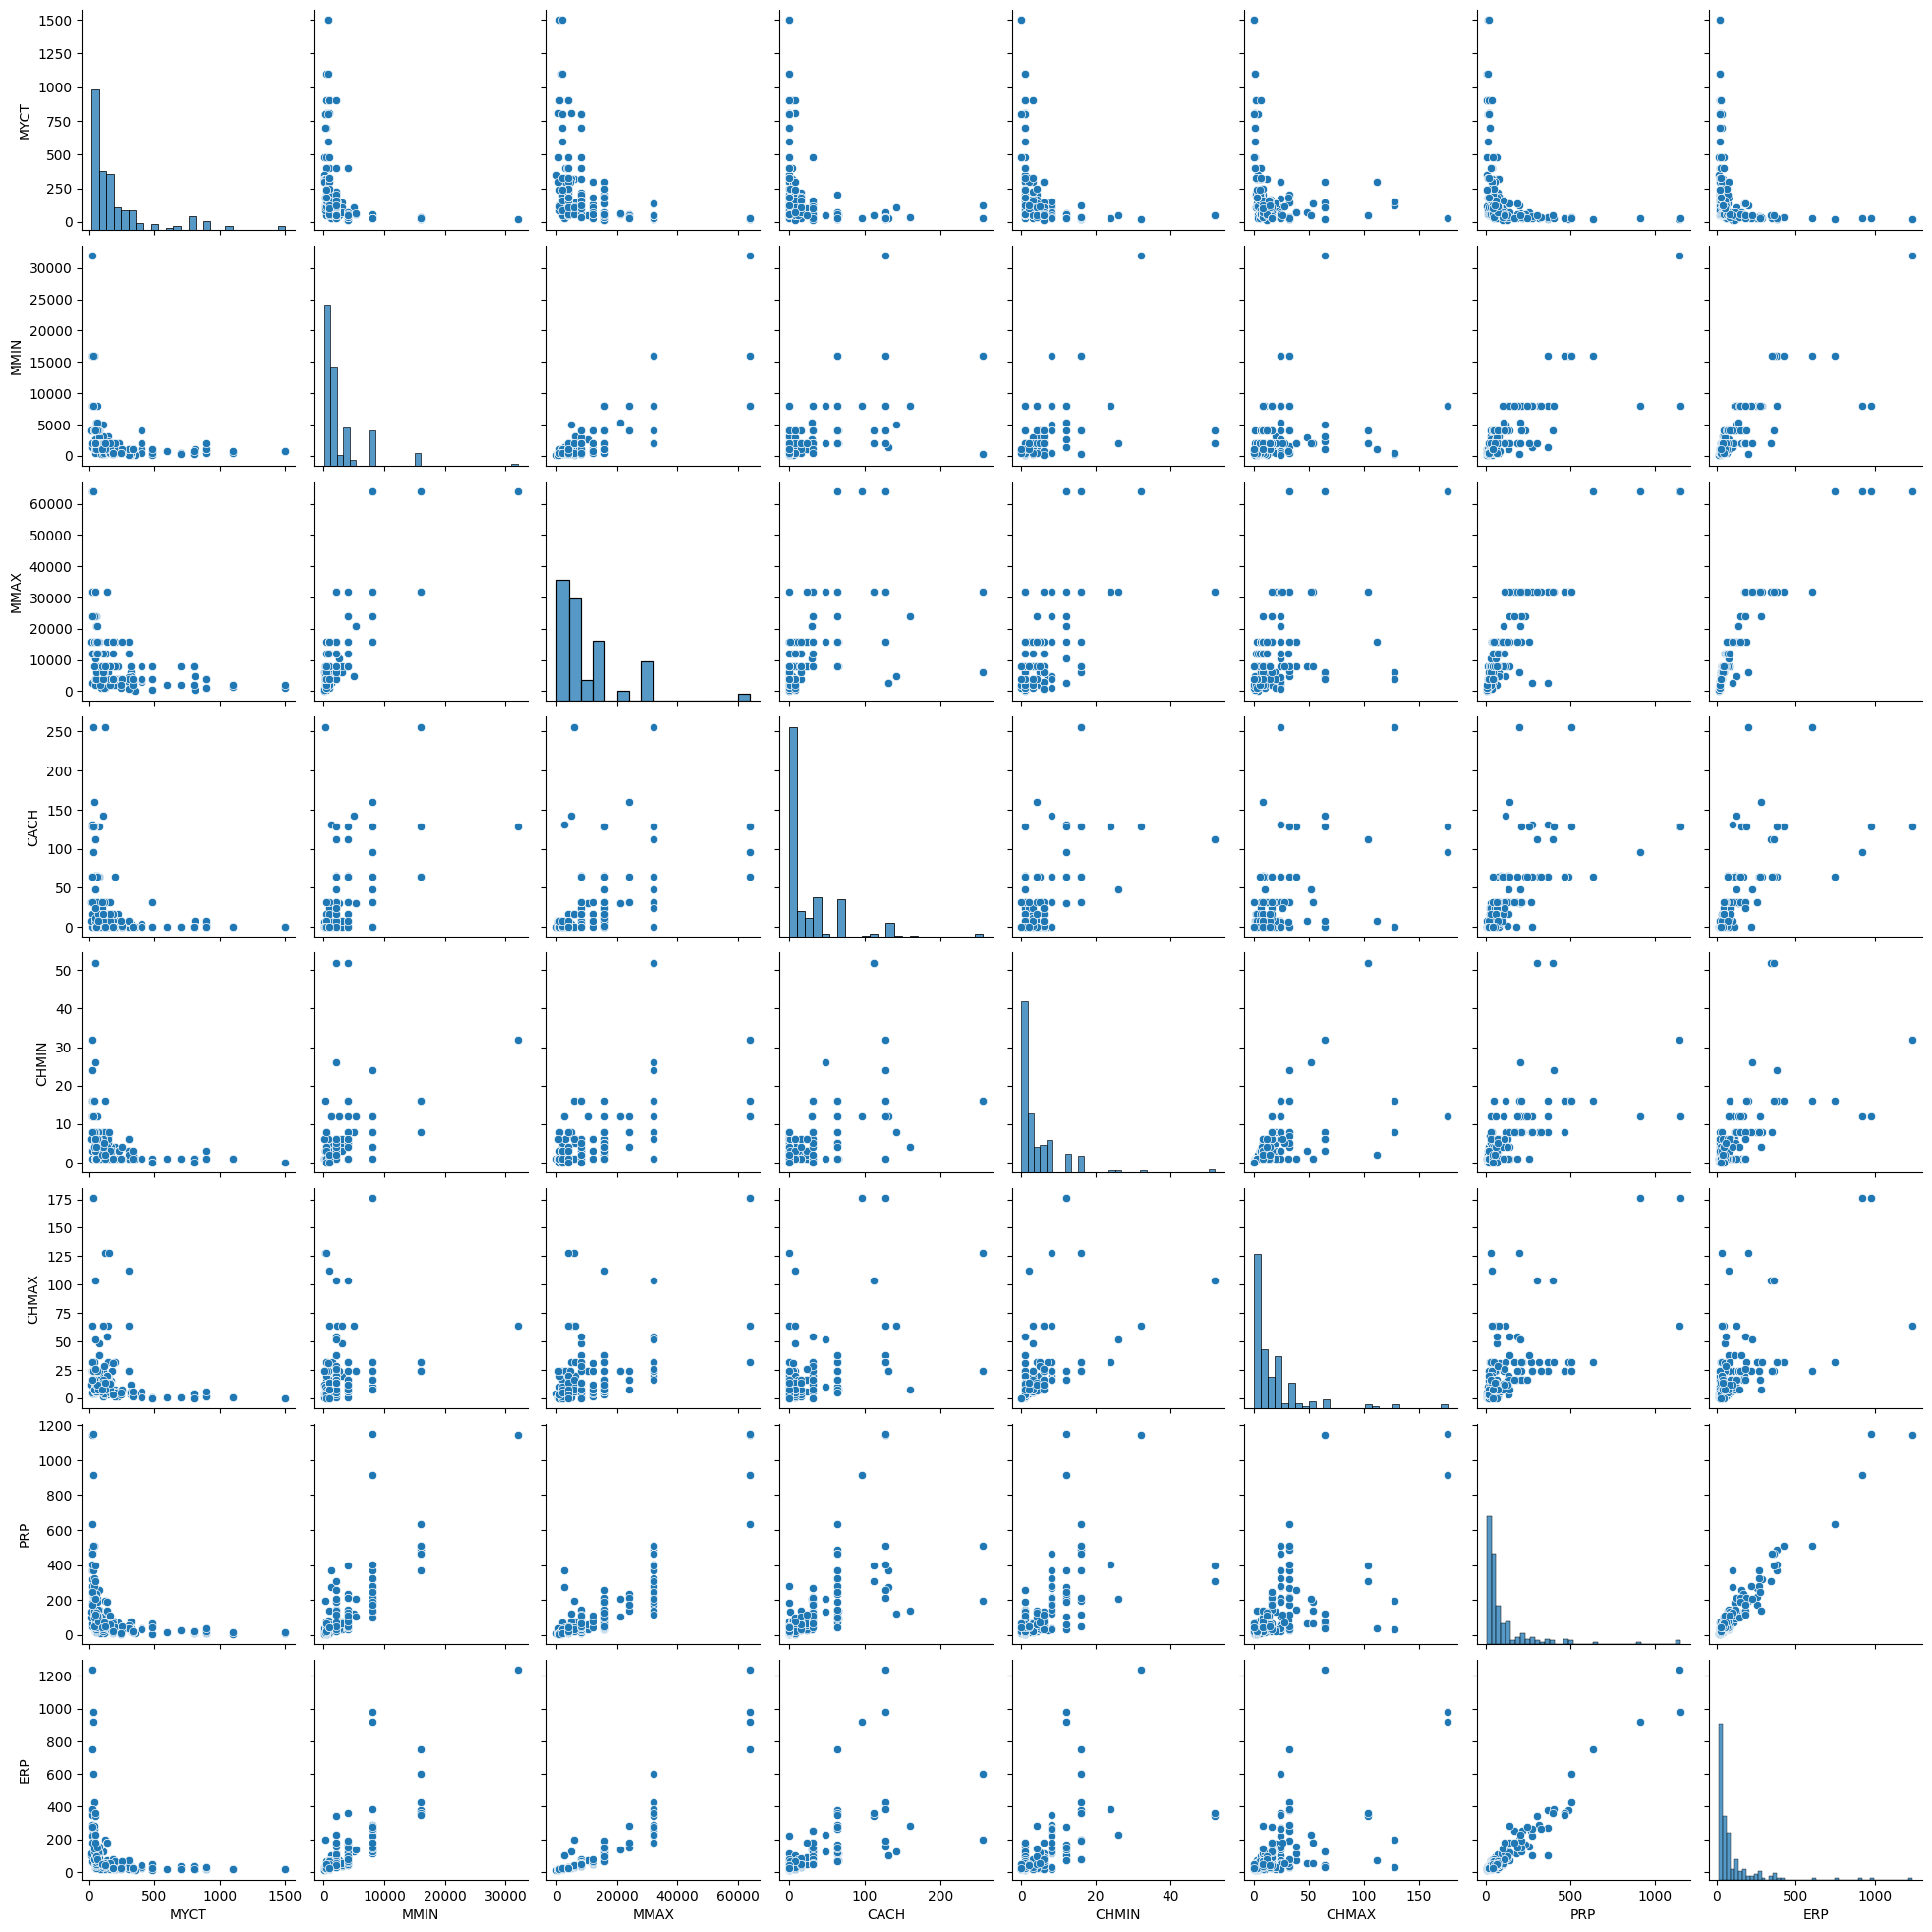

In [10]:
import seaborn as sns

sns.pairplot(data=num_features)

### Standardize the Data

In [11]:
import numpy as np

In [12]:
mean = np.mean(num_features, axis=0)
mean



MYCT       203.822967
MMIN      2867.980861
MMAX     11796.153110
CACH        25.205742
CHMIN        4.698565
CHMAX       18.267943
PRP        105.622010
ERP         99.330144
dtype: float64

In [13]:
std = np.std(num_features, axis=0)
std

MYCT       259.639541
MMIN      3869.452343
MMAX     11698.476757
CACH        40.531407
CHMIN        6.799947
CHMAX       25.935049
PRP        160.445509
ERP        154.386426
dtype: float64

In [14]:
standardized_data = (num_features - mean)/std 
standardized_data

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,0.575759,0.645587
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,1.018277,0.995359
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.712877,0.995359
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.413710,0.995359
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,0.164405,0.211611
...,...,...,...,...,...,...,...,...
204,-0.307438,-0.482751,-0.324500,-0.621882,-0.543911,-0.395910,-0.396533,-0.403728
205,-0.407576,-0.482751,-0.324500,0.167629,-0.396851,-0.395910,-0.371603,-0.319524
206,-0.303586,-0.224316,-0.324500,-0.621882,-0.396851,-0.164563,-0.334207,-0.377819
207,1.063694,-0.608867,-0.324500,0.167629,-0.690971,-0.704373,-0.240717,-0.338956


In [15]:
standardized_data.std()

MYCT     1.002401
MMIN     1.002401
MMAX     1.002401
CACH     1.002401
CHMIN    1.002401
CHMAX    1.002401
PRP      1.002401
ERP      1.002401
dtype: float64

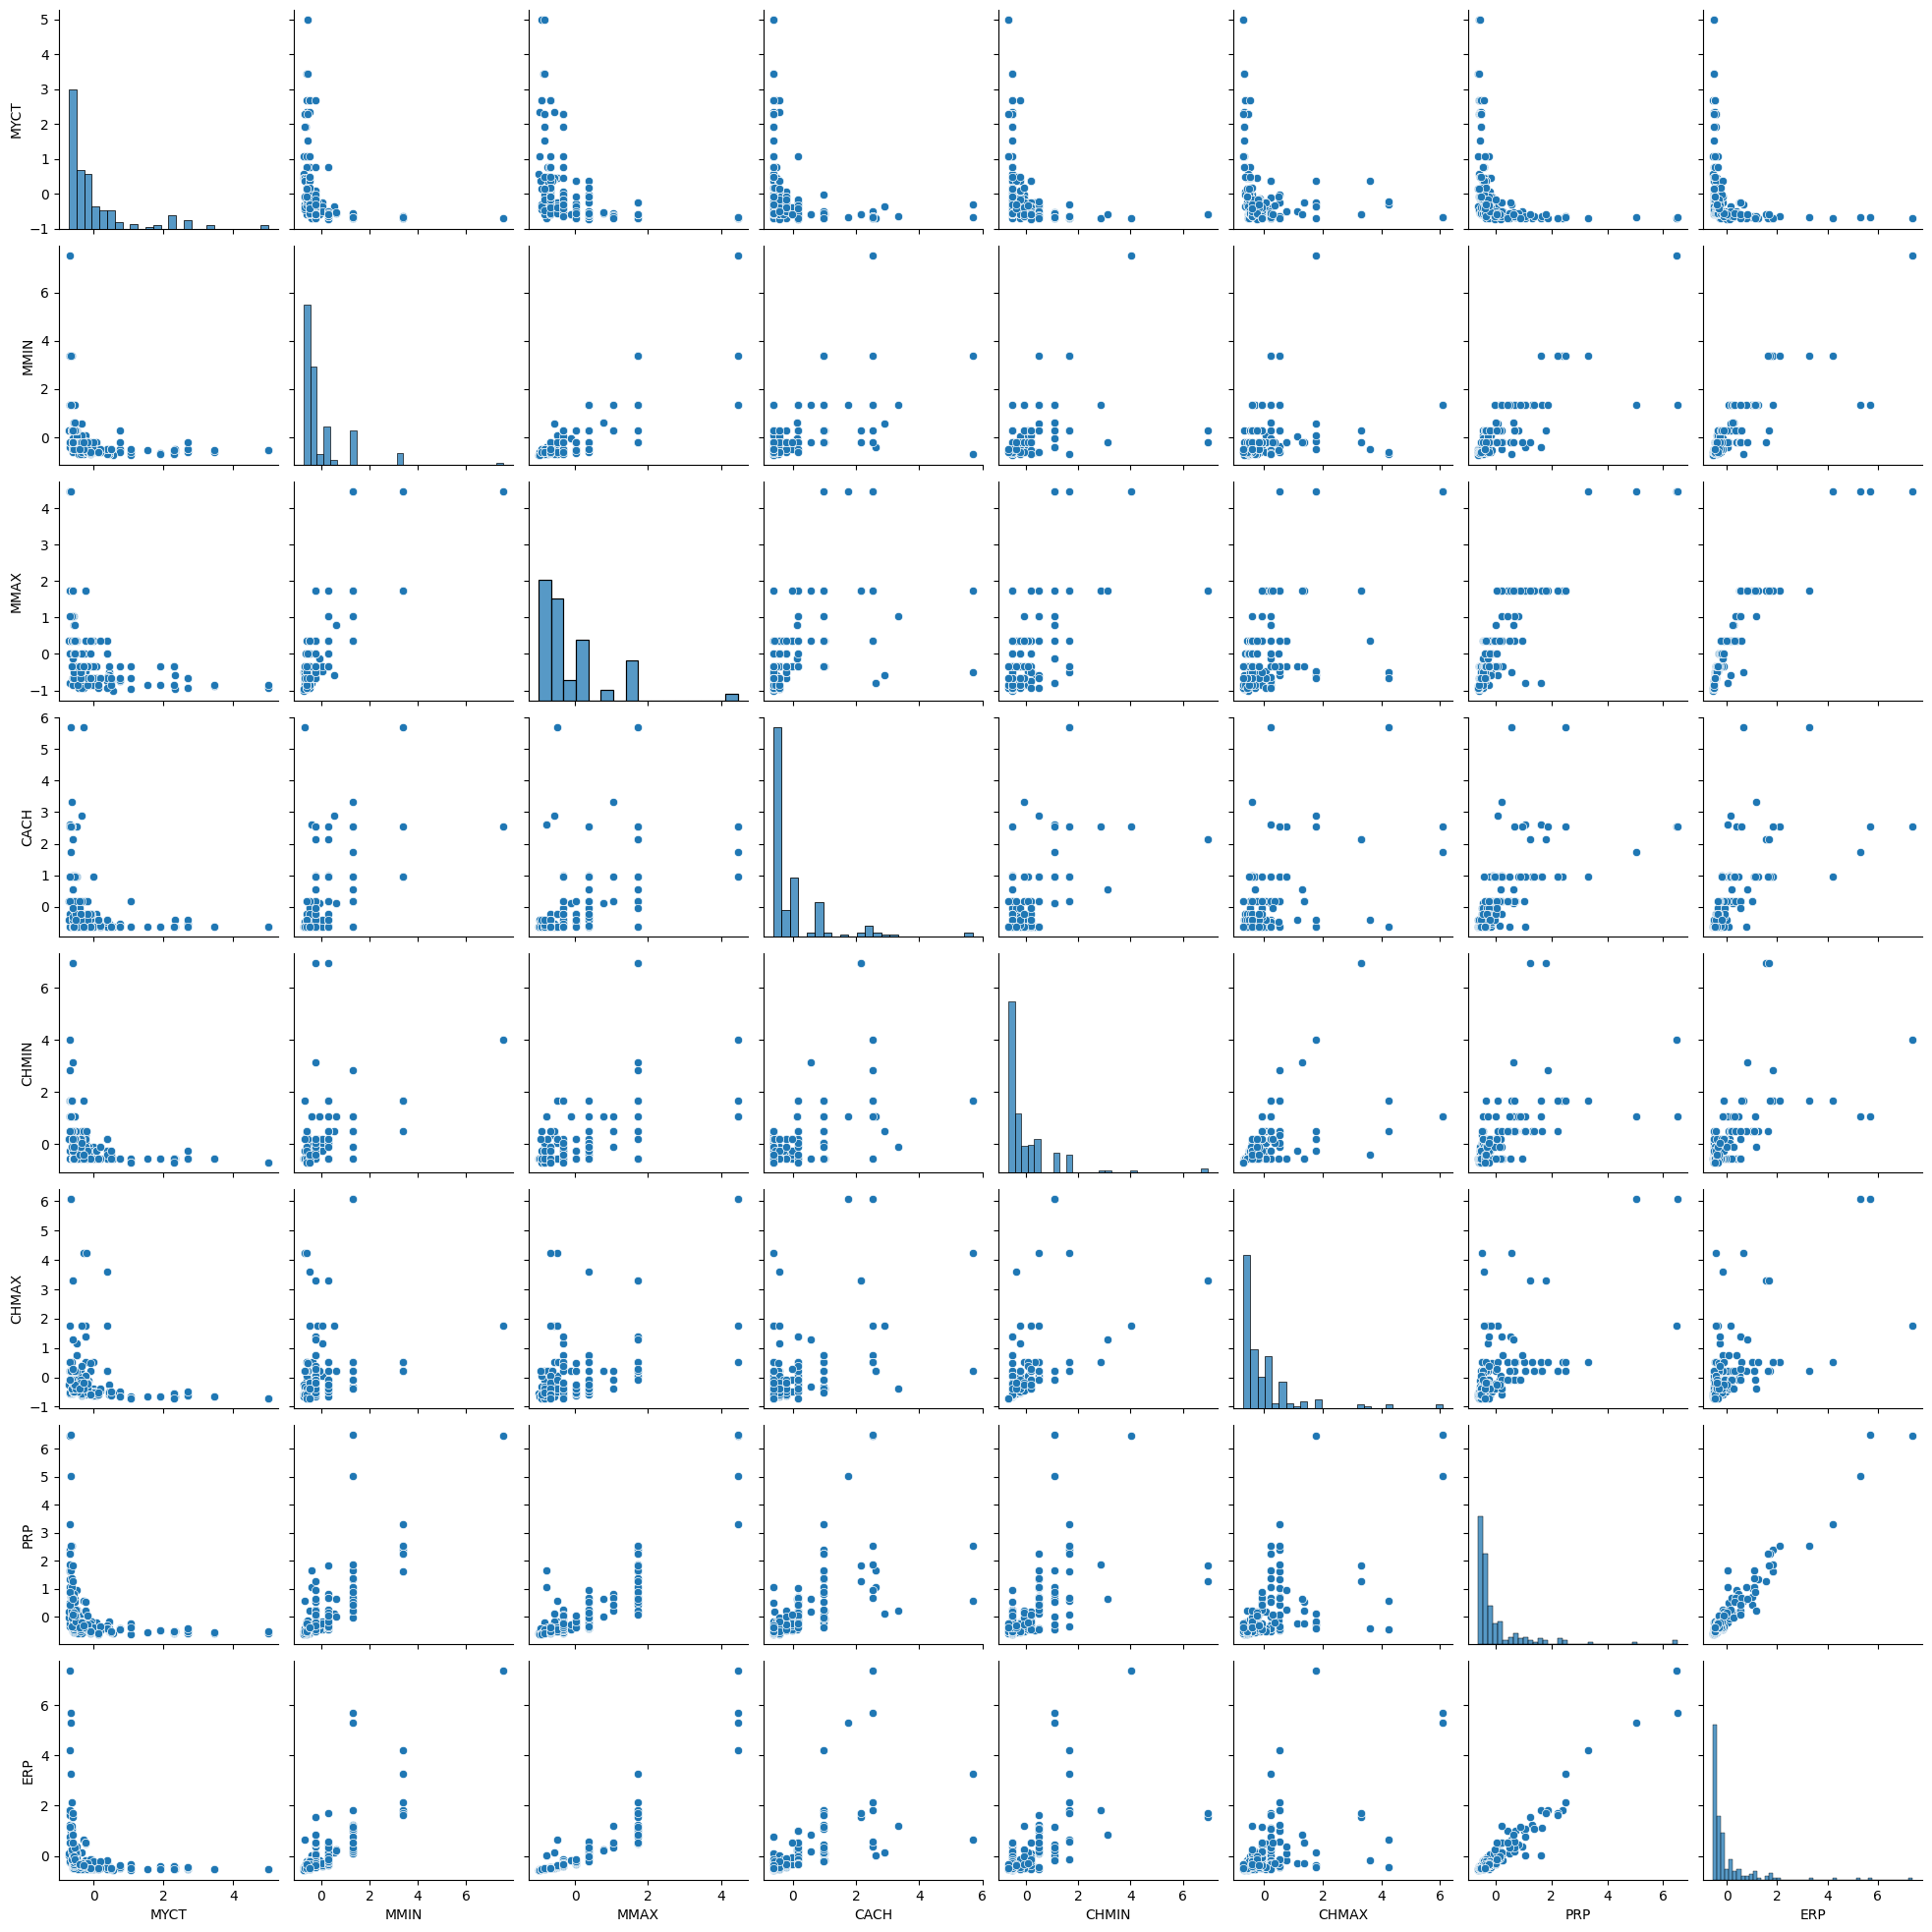

In [16]:
sns.pairplot(data=standardized_data)

### Insights From Pairplot

We can observe linear relationship between PRP and ERP so those two features will be optimum for performing PCA

In [40]:
data = standardized_data
data = data.drop(["PRP", "ERP"], axis=1) # ERP is the class attribute
data

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447
...,...,...,...,...,...,...
204,-0.307438,-0.482751,-0.324500,-0.621882,-0.543911,-0.395910
205,-0.407576,-0.482751,-0.324500,0.167629,-0.396851,-0.395910
206,-0.303586,-0.224316,-0.324500,-0.621882,-0.396851,-0.164563
207,1.063694,-0.608867,-0.324500,0.167629,-0.690971,-0.704373


In [41]:
#sns.scatterplot(x='PRP', y='ERP', data=data)

In [42]:
cov_matrix = np.cov(data, rowvar=False)
# for i in range(cov_matrix.shape[0]):
#     for j in range(cov_matrix.shape[1]):
#         print(f"{cov_matrix[i,j]:.2f}", end=" ")
#     print()

In [43]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(f"Eigen Values:\n{eigenvalues}")
print(f"\nEigen Vectors:\n{eigenvectors}")
eigenvectors.shape

Eigen Values:
[0.17475717 0.40636886 0.49871024 0.74277939 0.83334797 3.37288253]

Eigen Vectors:
[[-0.02708287  0.04523943  0.02695622 -0.66860232  0.68218424 -0.28998081]
 [ 0.63140861 -0.0083375   0.08818826 -0.5476845  -0.33298195  0.42736541]
 [-0.67176548  0.1352712   0.47695161 -0.26428174 -0.11408717  0.46913674]
 [-0.1208669   0.51868367 -0.71365487 -0.01993454  0.15163789  0.42856007]
 [-0.09879599 -0.81213824 -0.25459238  0.03019271  0.27463756  0.43533454]
 [ 0.35348461  0.22579707  0.4357669   0.42644906  0.55884878  0.37416675]]


(6, 6)

In [44]:
np.dot(eigenvectors[0],eigenvectors[1])

1.6653345369377348e-16

In [45]:
descending_eigenvalues = eigenvalues[::-1]

In [46]:
descending_eigenvalues

array([3.37288253, 0.83334797, 0.74277939, 0.49871024, 0.40636886,
       0.17475717])

In [47]:
sum_eigenvalues = np.sum(descending_eigenvalues)        

In [48]:
for i in range(1,len(descending_eigenvalues)+1):
    sum_of_i_eigen = np.sum(descending_eigenvalues[:i])
    print(f"Proportion of {i} = {sum_of_i_eigen/sum_eigenvalues}")

Proportion of 1 = 0.5594573887493591
Proportion of 2 = 0.6976841653838327
Proportion of 3 = 0.8208884022552221
Proportion of 4 = 0.9036090801353474
Proportion of 5 = 0.9710131649120174
Proportion of 6 = 1.0


The first three principal components corresponds to more than 70% of the proportions. So, the other principal components can be removed. 

In [49]:
feature_vector = eigenvectors[:,-3:]
feature_vector = feature_vector.transpose()
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
MYCT,-0.303586,-0.673330,-0.673330,-0.673330,-0.673330,-0.684884,-0.696438,-0.696438,-0.696438,-0.696438,...,-0.669478,-0.091754,-0.091754,-0.091754,-0.091754,-0.307438,-0.407576,-0.303586,1.063694,1.063694
MMIN,-0.675026,1.326291,1.326291,1.326291,1.326291,1.326291,3.393767,3.393767,3.393767,7.528719,...,1.326291,-0.673475,-0.608867,-0.673475,-0.608867,-0.482751,-0.482751,-0.224316,-0.608867,-0.482751
MMAX,-0.495462,1.727049,1.727049,1.727049,0.359350,1.727049,1.727049,1.727049,4.462448,4.462448,...,4.462448,-0.666425,-0.666425,-0.666425,-0.666425,-0.324500,-0.324500,-0.324500,-0.324500,-0.666425
CACH,5.694208,0.167629,0.167629,0.167629,0.167629,0.957141,0.957141,0.957141,0.957141,2.536163,...,2.536163,-0.621882,-0.621882,-0.621882,-0.621882,-0.621882,0.167629,-0.621882,0.167629,-0.621882
CHMIN,1.661989,0.485509,0.485509,0.485509,0.485509,0.485509,1.661989,1.661989,1.661989,4.014948,...,1.073749,-0.543911,-0.543911,-0.543911,-0.543911,-0.543911,-0.396851,-0.396851,-0.690971,-0.690971
CHMAX,4.231033,0.529479,0.529479,0.529479,-0.087447,0.529479,0.529479,0.529479,0.529479,1.763330,...,6.081811,-0.588699,-0.588699,-0.588699,-0.588699,-0.395910,-0.395910,-0.164563,-0.704373,-0.704373


In [50]:
final_data = np.matmul(feature_vector, data)
final_data


,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,2.444610,-0.495514,-0.495514,-0.495514,-0.397143,-0.503527,-1.592605,-1.592605,-2.315521,-4.014430,...,1.117327,0.351247,0.315862,0.351247,0.315862,0.382847,0.438502,0.341830,-0.616545,-0.579514
1,3.758606,-0.643343,-0.643343,-0.643343,-0.832075,-0.531506,-0.904715,-0.904715,-1.216789,-1.018466,...,2.670836,-0.334980,-0.356494,-0.334980,-0.356494,-0.476893,-0.385099,-0.390644,0.407413,0.284708
2,4.314055,2.053597,2.053597,2.053597,1.181126,2.395301,3.794381,3.794381,5.077657,9.007490,...,6.684395,-1.297426,-1.269814,-1.297426,-1.269814,-0.920828,-0.489416,-0.660916,-1.213411,-1.658276


In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
final_data = final_data.transpose()

In [52]:
fig = plt.figure(figsize=(10,10))
# plot final_data in a 3d plot



<Figure size 1000x1000 with 0 Axes>

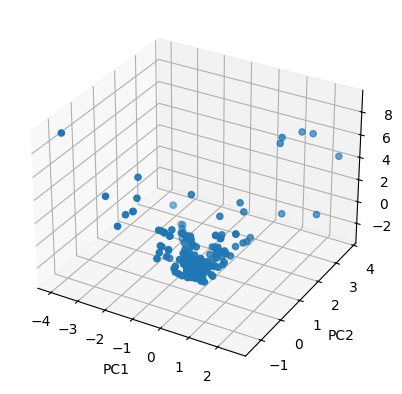

In [53]:

ax = plt.axes(projection="3d")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(final_data[0], final_data[1], final_data[2])


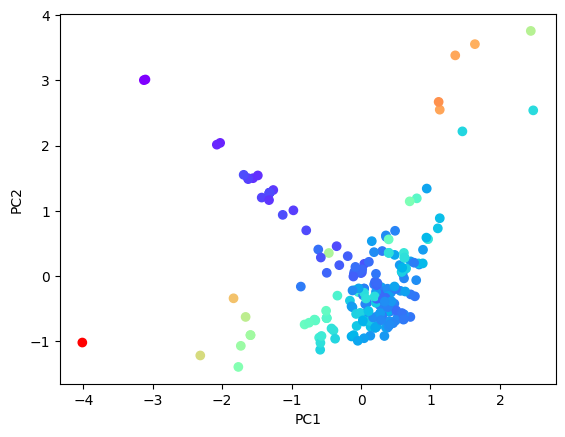

In [54]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(final_data[0],final_data[1],c=final_data[2],cmap='rainbow')

In [57]:
final_data.rename(columns={0:'PC1',1:'PC2',2:'PC3'}, inplace=True)
final_data

,PC1,PC2,PC3
0,2.444610,3.758606,4.314055
1,-0.495514,-0.643343,2.053597
2,-0.495514,-0.643343,2.053597
3,-0.495514,-0.643343,2.053597
4,-0.397143,-0.832075,1.181126
...,...,...,...
204,0.382847,-0.476893,-0.920828
205,0.438502,-0.385099,-0.489416
206,0.341830,-0.390644,-0.660916
207,-0.616545,0.407413,-1.213411


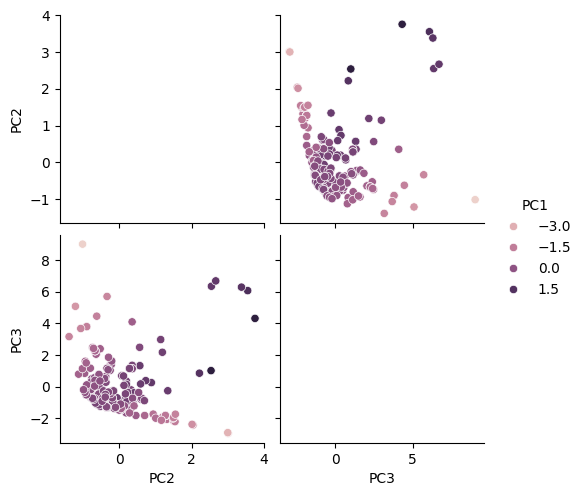

In [62]:
sns.pairplot(final_data)

<Axes: xlabel='PC1', ylabel='PC2'>

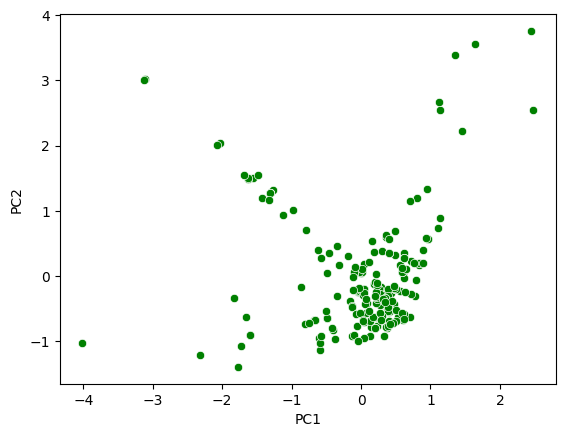

In [68]:
sns.scatterplot(x='PC1', y='PC2', data=final_data, c='green')

<Axes: xlabel='PC1', ylabel='PC3'>

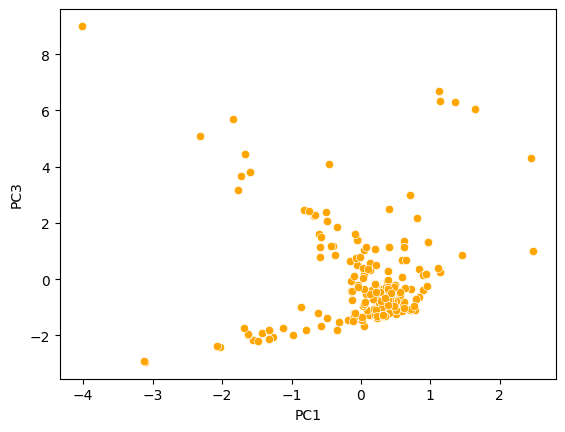

In [71]:
sns.scatterplot(x='PC1', y='PC3', data=final_data, c='orange')

<Axes: xlabel='PC2', ylabel='PC3'>

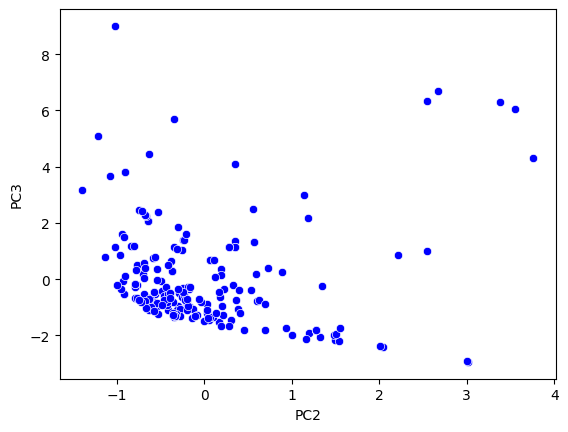

In [70]:
sns.scatterplot(x='PC2', y='PC3', data=final_data, c='blue')

In [103]:
import pandas as pd
processed_data = pd.concat([df[['VendorName','ModelName']], final_data], axis = 1).T.drop_duplicates().T
top_vendors = processed_data['VendorName'][:20].unique()
top_vendors

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs'],
      dtype=object)

In [88]:
processed_data['VendorName']

0      adviser
1       amdahl
2       amdahl
3       amdahl
4       amdahl
        ...   
204     sperry
205     sperry
206     sratus
207       wang
208       wang
Name: VendorName, Length: 209, dtype: object

In [108]:
processed_data.head(20)

,VendorName,ModelName,PC1,PC2,PC3
0,adviser,32/60,2.44461,3.758606,4.314055
1,amdahl,470v/7,-0.495514,-0.643343,2.053597
2,amdahl,470v/7a,-0.495514,-0.643343,2.053597
3,amdahl,470v/7b,-0.495514,-0.643343,2.053597
4,amdahl,470v/7c,-0.397143,-0.832075,1.181126
5,amdahl,470v/b,-0.503527,-0.531506,2.395301
6,amdahl,580-5840,-1.592605,-0.904715,3.794381
7,amdahl,580-5850,-1.592605,-0.904715,3.794381
8,amdahl,580-5860,-2.315521,-1.216789,5.077657
9,amdahl,580-5880,-4.01443,-1.018466,9.00749


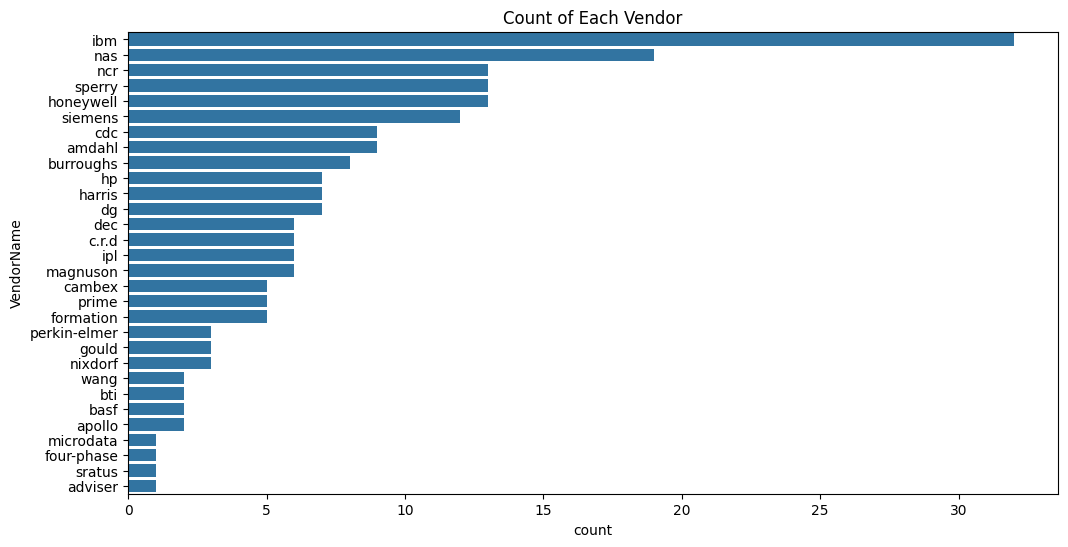

In [109]:
plt.figure(figsize=(12, 6))
sns.countplot(y='VendorName', data=processed_data, order=processed_data['VendorName'].value_counts().index)
plt.title('Count of Each Vendor')
plt.show()

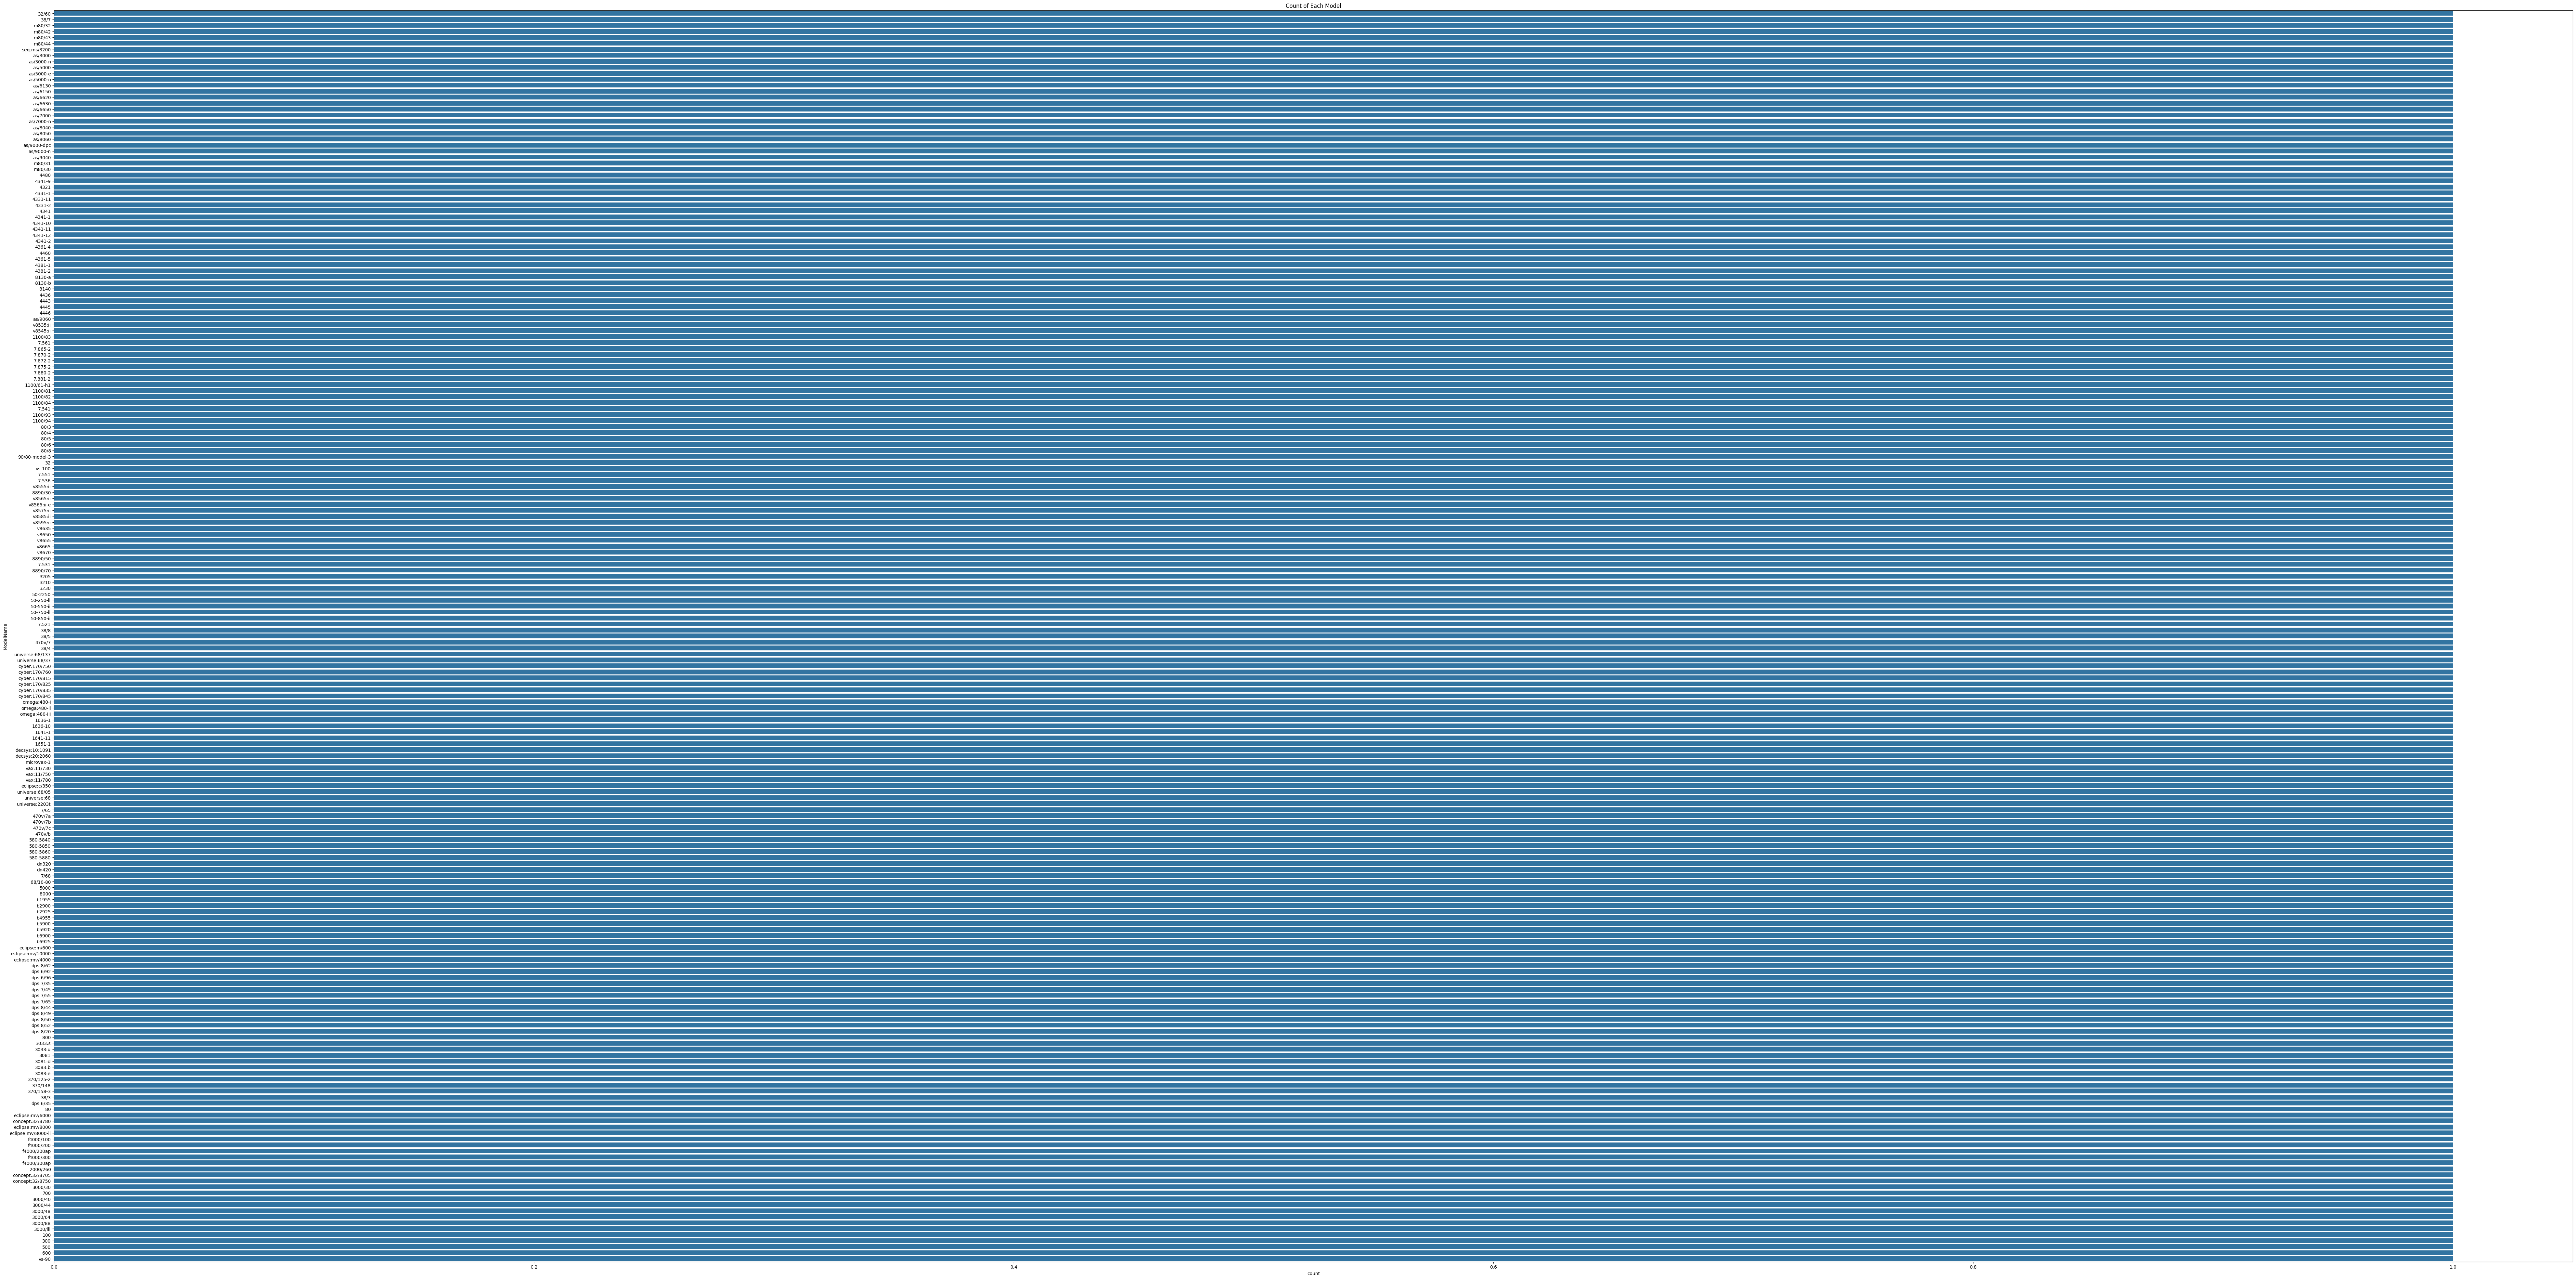

In [112]:
plt.figure(figsize=(100, 50))
sns.countplot(y='ModelName', data=processed_data, order=processed_data['ModelName'].value_counts().index)
plt.title('Count of Each Model')
plt.show()


/home/atul/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/atul/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/atul/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/atul/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/atul/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
T

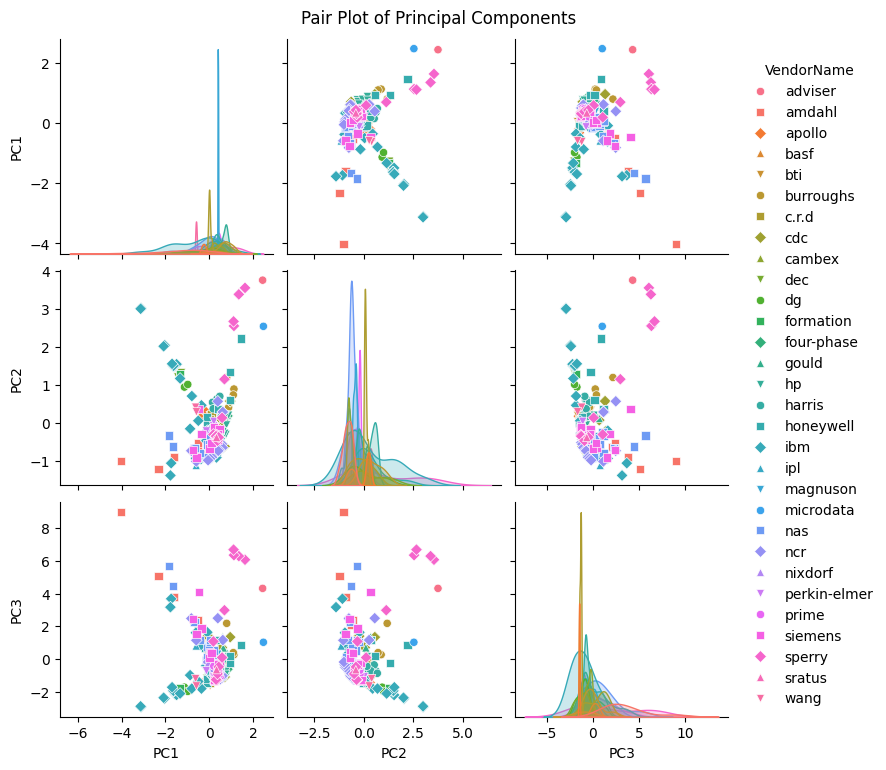

In [114]:
sns.pairplot(processed_data, vars=['PC1', 'PC2', 'PC3'], hue='VendorName', markers=['o', 's', 'D', '^', 'v'])
plt.suptitle('Pair Plot of Principal Components', y=1.02)
plt.show()

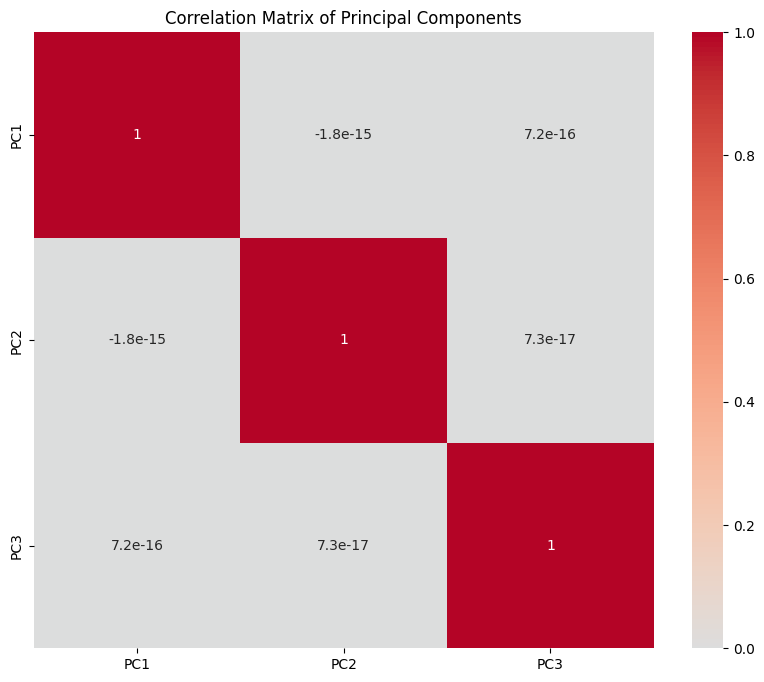

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(processed_data[['PC1', 'PC2', 'PC3']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Principal Components')
plt.show()

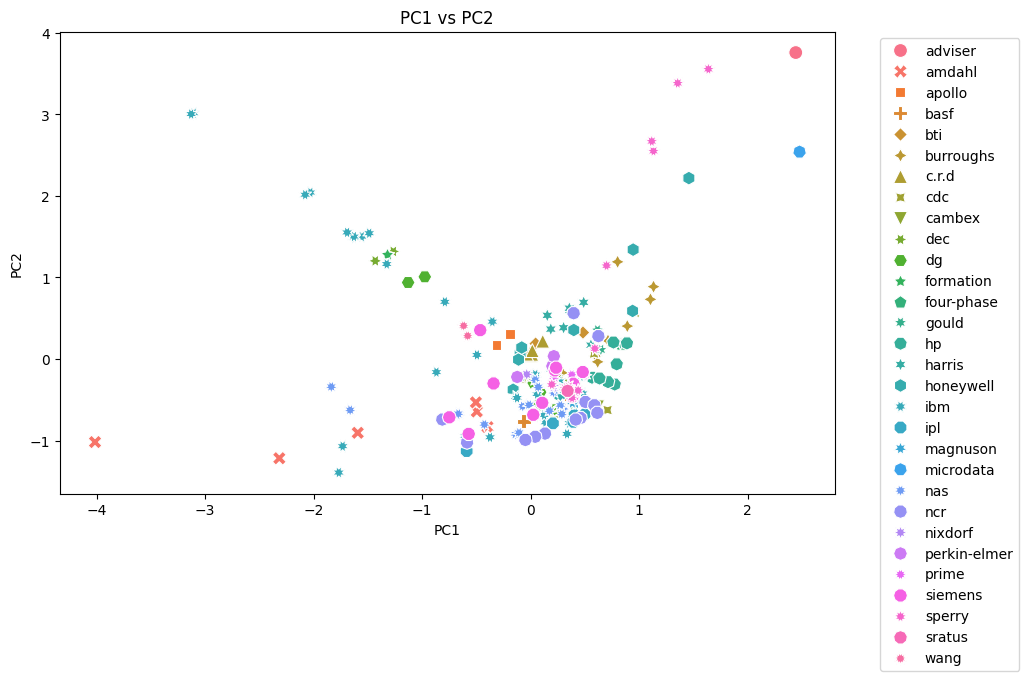

In [118]:
# Scatter plot for PC1 vs PC2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='VendorName', style='VendorName', s=100, data=processed_data)
plt.title('PC1 vs PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

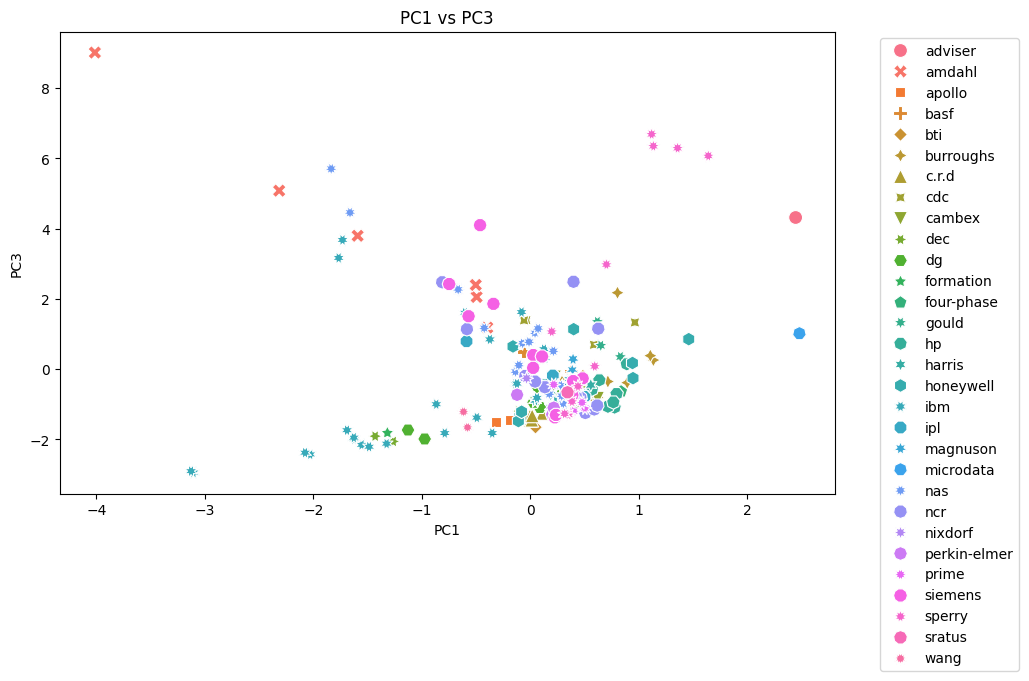

In [120]:
# Scatter plot for PC1 vs PC3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC3', hue='VendorName', style='VendorName', s=100, data=processed_data)
plt.title('PC1 vs PC3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

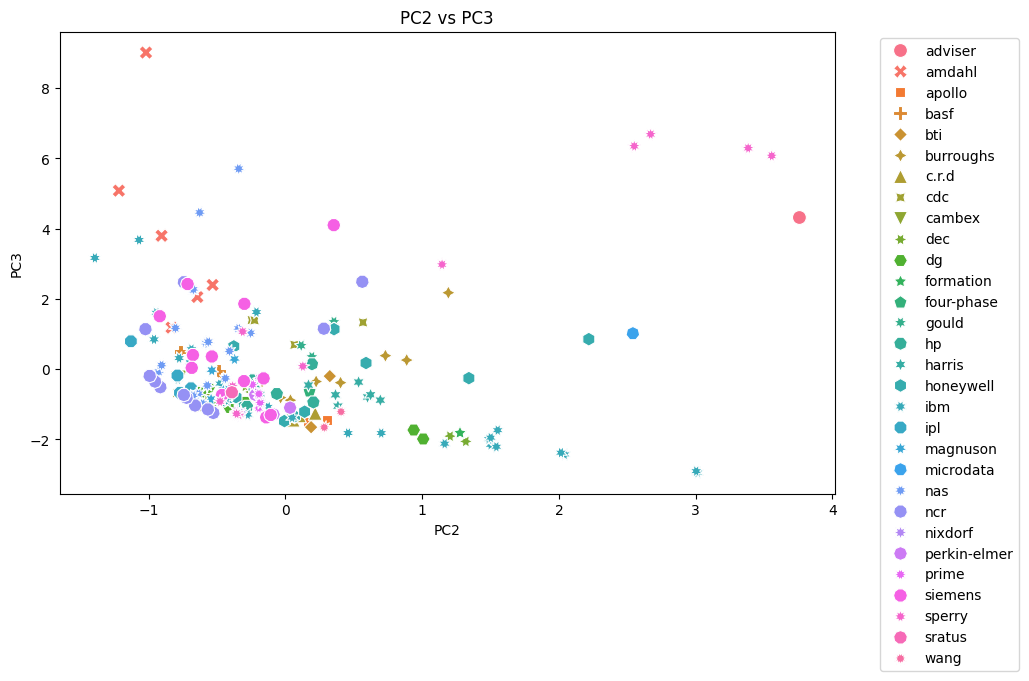

In [121]:
# Scatter plot for PC2 vs PC3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC2', y='PC3', hue='VendorName', style='VendorName', s=100, data=processed_data)
plt.title('PC2 vs PC3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()